# Numerical analysis of the Steinberg signature on the 3-vertex graph $K$. 

# Haque, Çetiner, Gunawardea 2024. _Anomalous behavior of the Steinberg signature for detecting departure from thermodynamic equilibrium._

In [1]:
# numpy == 1.21.5
import numpy as np
# scipy == 1.7.3
import scipy.linalg
# to make nice plots
import matplotlib.pyplot as plt
# optional -- to track how long a simulation will| take
from tqdm import tqdm

from steinberg_utils_3vertex import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Sampling parameters for the 3-vertex graph $K$

Parameters are defined as $10^x$, where $x$ is uniformly sampled from $(-3, 3)$. The user can specify the endpoints of this range to sample parameter space more broadly, but $-3$ and $3$ are set as the default parameters.

In [3]:
params = random_parameters()

In [4]:
print(params)

[2.365e+02 4.512e+02 7.000e+01 6.434e+00 3.298e-02 3.683e-03]


The parameters can be determined such that they satisfy the cycle condition on $K$, initializing the graph in an equlibrium steady state.

In [5]:
params = equilibrium_parameters()

In [6]:
print(params)

[5.153e-01 3.116e-03 1.460e-02 2.601e-01 2.088e-03 2.249e-04]


To generate the figure in the paper, we will manually assign values for the edge labels of the 3-vertex graph. The parameters for the 3-vertex graph are listed in the following order: $[a, b, d, c, f, e]$

In [7]:
params = [0.6896, 0.2137, 0.0083, 3.9254, 4.9104, 0.0321]
# a, b, d, c, f, e
#[0.08833331, 0.44953403, 0.58597936, 0.02356496, 0.00747019, 0.75898155]

Next, we compute the Laplacian matrix $\mathcal{L}(K)$ for this specific parameterzation of $K$, and the steady state distribution $\pi(K)$ as computed through the Matrix-Tree Theorem.

In [8]:
L = Laplacian_K(params)
print(L)

[[-5.6     0.2137  0.0321]
 [ 0.6896 -0.222   3.9254]
 [ 4.9104  0.0083 -3.9575]]


In [9]:
pi = steady_state_MTT_K(params)
print(pi)

[0.03532855 0.91890917 0.04576228]


We can also calculate the cycle affinity $\tilde{A}(C)$ for $K$. The cycle affinity  quantifies the departure from equilibrium that arises from the cycle $C$. We take the absolute value of the cycle affinity in our calculation.

In [10]:
cycle_affinity_K(params)

10.017684117754547

# Numerical calculation of the autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$

Recall the linear framework formula for the asymmetric autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$, specified in the text by Eq. 20,

$$ \mathcal{A}^{\alpha,\beta} (\tau) = (S^\beta)^T \cdot \exp\left (\mathcal{L}(G) \tau \right ) \cdot \Delta \left ( u^*(G) \right ) \cdot S^\alpha $$

where $S$ denotes the column vector $S = \left ( S(1), \cdots , S(N) \right )^T$ and $S^k$ is taken component-wise. The Steinberg signature exploits the discrepancy between $\mathcal{A}^{\alpha,\beta} (\tau)$ and $\mathcal{A}^{\beta,\alpha} (\tau) = \mathcal{A}^{\alpha,\beta}_r (\tau)$ to detect whether a stochastic system is away from thermodynamic equilibrium. To assess the efficacy of the Steinberg signature, we must be able to compute the autocorrelation function numerically.

Let us define the values of our stochastic signal $f(t)$. Here, we define $f(t)$ so it takes one of the values $S(1) = 3, S(2) = 5, S(3) = 7$ when the system occupies state $1$, $2$, or $3$, respectively. We also take $\alpha = 1$ and $\beta = 3$, as in the text.

In [11]:
signal = [3, 5, 7]
alpha = 1
beta = 3

Next, we set a range for the $\tau$ values -- this range can be altered depending on the shape of the autocorrelation functions. Recall that $\mathcal{A}^{\alpha,\beta}(0) = \mathcal{A}^{\beta, \alpha}(0) = \langle S^{\beta + \alpha} \rangle$ and $\lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \langle S^\beta \rangle \langle S^\alpha \rangle$.

In [15]:
# manually defined because the fully decay is known for this parameter set
tau = np.linspace(0.001, 2.0, num=500)

We can now numerically compute the asymmetric autocorrelation functions by taking all the above defined quantities and plugging them into the formula reproduced above. The function `asymmetric_autocorrelation` performs this calculation for us.

In [16]:
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

In [17]:
area = numerical_area(a_13, a_31)
area

430.0664340520161

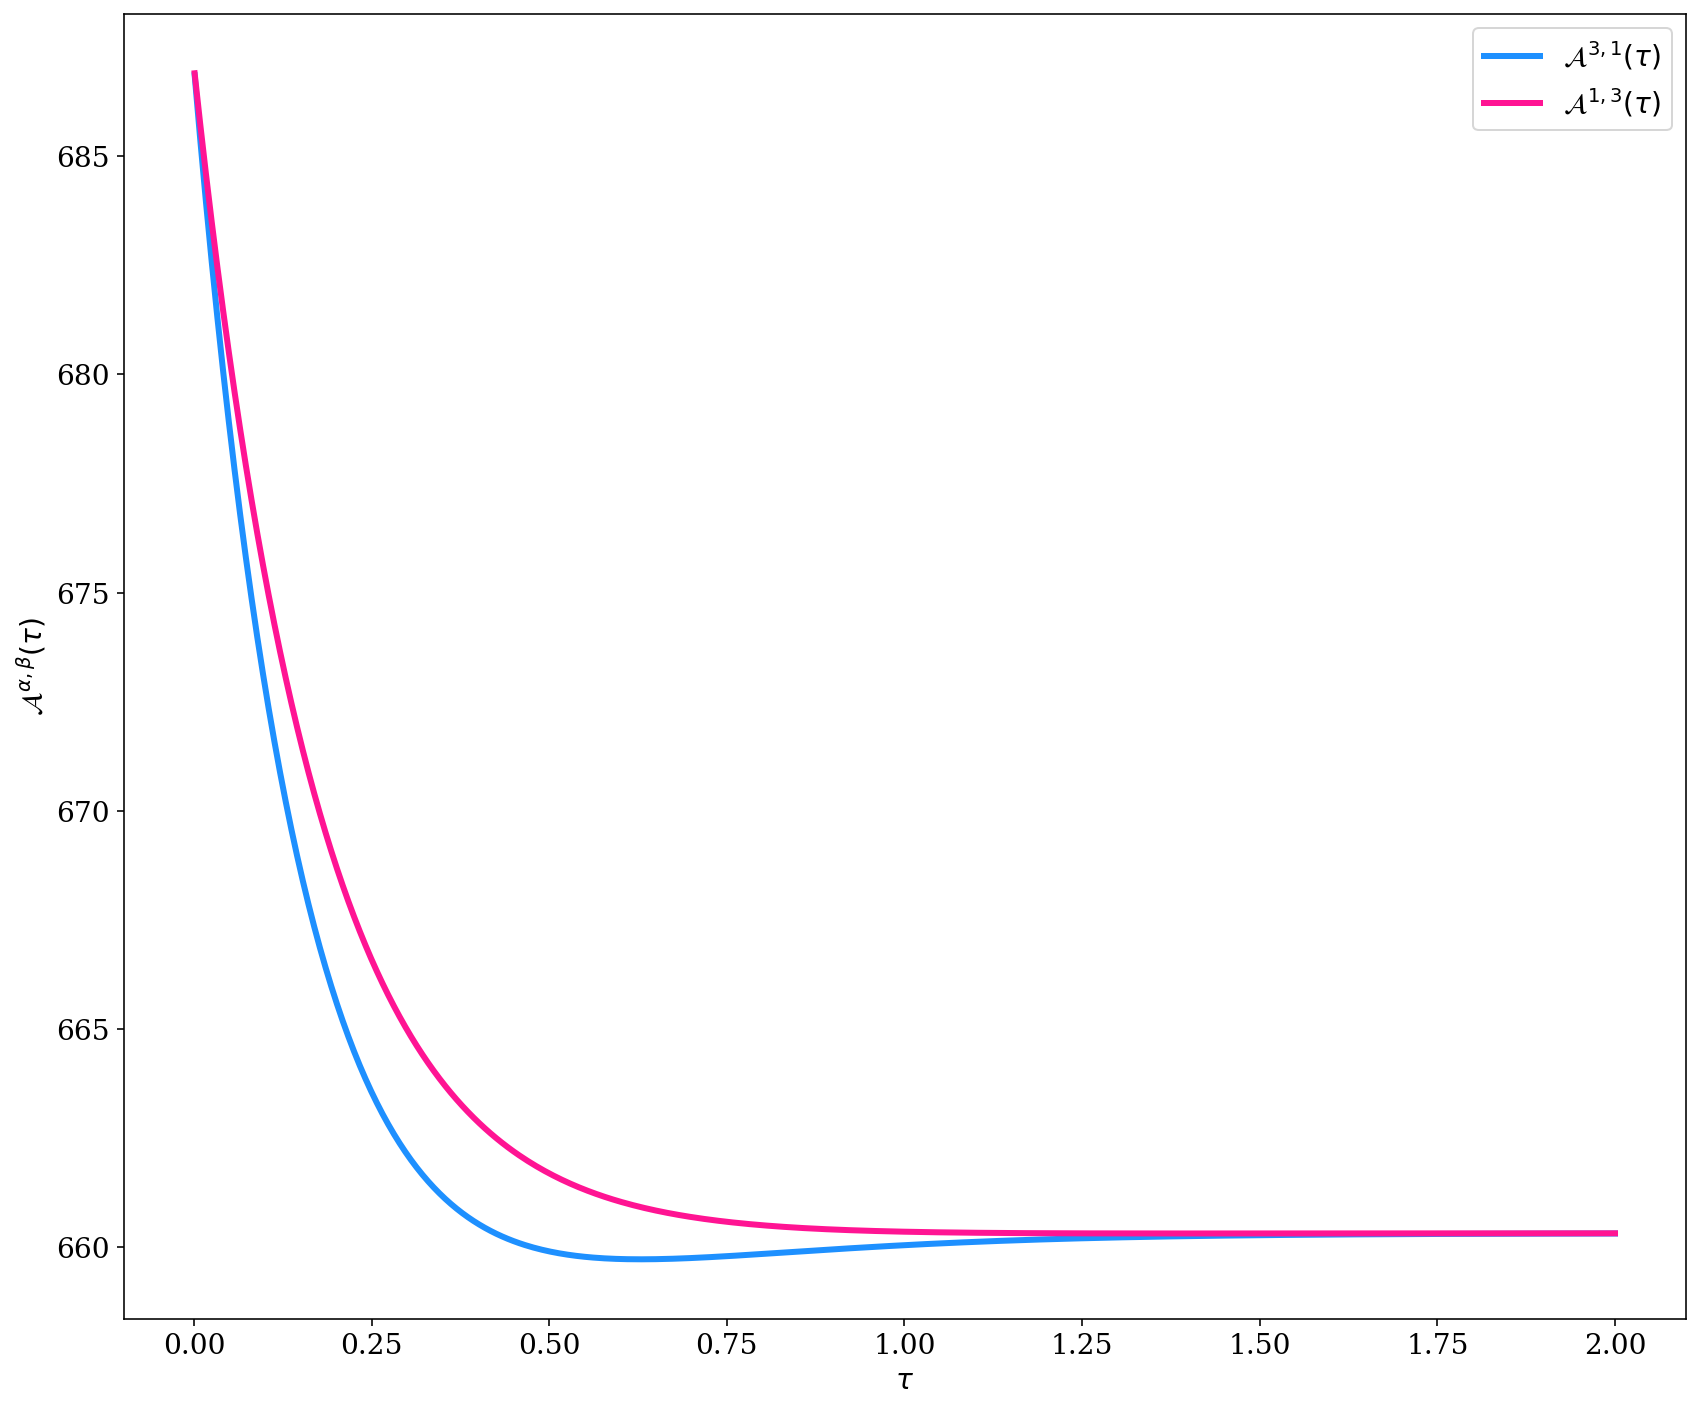

In [18]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, color= 'dodgerblue')
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color='deeppink')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()
#fig.savefig('fig_3A_2.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# The Steinberg signature $\mathcal{I}^{1,3}(G)$ in response to increasing entropy production

We can think of the area difference between $\mathcal{A}^{\alpha,\beta}(\tau)$ and $\mathcal{A}^{\beta,\alpha}(\tau)$ as an indirect measure of quantifying the Steinberg signature, given in the text by Eq. 30,

$$ \mathcal{I}^{\alpha,\beta}(G) = \int_0^\infty \left ( \mathcal{A}^{\alpha,\beta}(\tau) - \mathcal{A}^{\beta,\alpha}(\tau) \right ) d \tau .$$

We call $\mathcal{I}^{\alpha,\beta}(G)$ the Steinberg signature for a given linear framework graph $G$ and signals $S(i)$. The goal of the present work is to assess the mathematical behavior of $\mathcal{I}^{\alpha,\beta}(G)$ and evaluate its efficacy as a signature of departure from equilibrium. In this section, we will investigate how the Steinberg signature behaves in response to increasing entropy production in the underlying system. We look into this by initializing $K$ in an equilibrium steady state, then selecting a single transition rate in $K$ to increase from its equilibrium value. We can then plot the value of the Steinberg signature against the value of the cycle affinity as it increases from $0$ to observe how the Steinberg signature varies in response to increasing entropy production. 

In the paper, we derive several analytical formulas for $\mathcal{I}^{\alpha,\beta}(G)$. Here, we numerically estimate $|\mathcal{I}^{\alpha,\beta}(G)|$ both by using the Python functions for computing the area underneath the curve.

First, we define the starting equilibrium parameters for $K$. We can see that the cycle affinity for this parameter set is zero.

In [26]:
params = round_to_sigfigs(equilibrium_parameters())
print(params)
print(cycle_affinity_K(params))

[4.243e-03 5.239e+00 3.055e-03 1.927e-02 3.249e-01 2.531e+03]
0.00022235386145819127


Let us next define the conditions for calculating the asymmetric autocorelation functions as above.

In [29]:
signal = [3,5,7]
tau = define_tau_range(L, max_points=500, cap_factor=10.0)
alpha = 1
beta = 3

We can compute the area between $\mathcal{A}^{1,3}(\tau)$ and $\mathcal{A}^{3,1}(\tau)$ numerically using the Python functions for the area under the curve. This function takes the absolute value of the area function. For the starting equilbrium parameters, the Steinberg signature's value should also be zero.

In [30]:
L = Laplacian_K(params)
pi = steady_state_MTT_K(params)
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
area = numerical_area(a_13,a_31)
print(area)

ValueError: operands could not be broadcast together with shapes (3,3) (500,) 

Next, we select one of the parameters in $K$.

In [31]:
# determine which parameter to perturb from its equilibrium value
param_choice = np.random.choice(np.arange(0,6),size=1)[0]
print(param_choice)

4


Now, we will progressively incease the value of the chosen parameter from its equilibrium value and calculate the cycle affinity and Steinberg signature at each step. This modification will cause the cycle affinity to increase linearly from zero as $K$ is driven further away from equilibrium. We are particularly interested to see how the value of the Steinberg signature changes. Specifically, we are keen to see if the signature varies monotonically in response to increasing entropy production.

The user can determine the extent to which the selected parameter is increased from its equilibrium value with the variable `num_perturbations`.

In [32]:
num_perturbations = 2000

affinities = np.zeros(num_perturbations)
areas = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities[i] = cycle_affinity_K(params)
    
    # compute the autocorrelation functions
    L = Laplacian_K(params)
    tau, tau_max = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_MTT_K(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    
    # store the area
    areas[i] = numerical_area(a_13,a_31)
    
    # modify the selected parameter
    params[param_choice] = params[param_choice]*1.01

100%|███████████████████████████████████████| 2000/2000 [02:46<00:00, 12.05it/s]


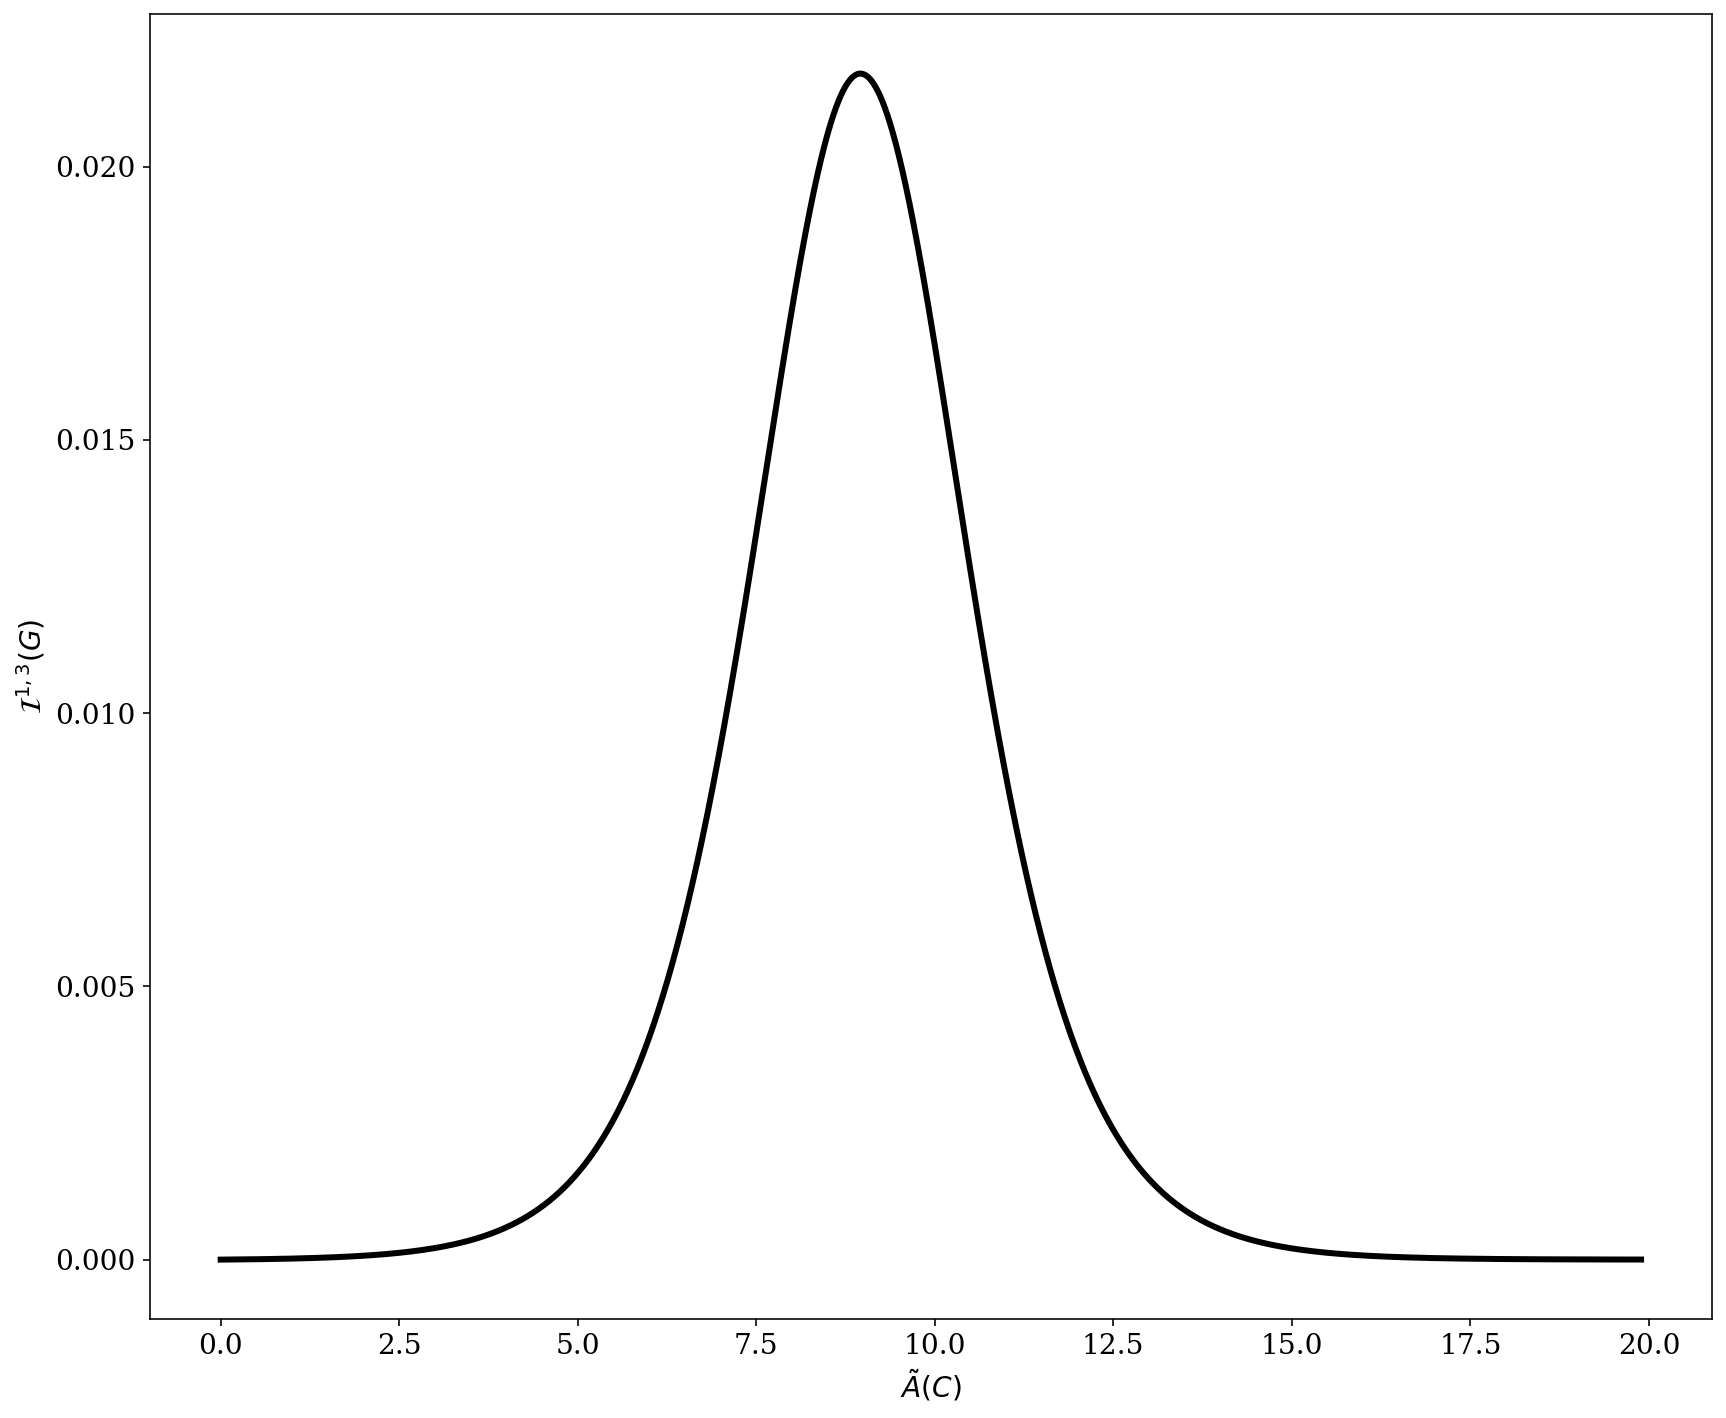

In [33]:
fig, ax = plt.subplots(figsize = (14, 12))
plt.plot(affinities, areas, color = "00000", linewidth=3)
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
#fig.savefig('title_here.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

In [34]:
# running this simulation for a sepecific parameter set
params = round_to_sigfigs([8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181])
print(params)
param_choice = 0

num_perturbations = 2000

affinities = np.zeros(num_perturbations)
areas = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities[i] = cycle_affinity_K(params)
    
    # compute the autocorrelation functions
    L = Laplacian_K(params)
    tau, tau_max = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_MTT_K(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    
    # store the area
    areas[i] = numerical_area(a_13,a_31)
    
    # modify the selected parameter
    params[param_choice] = params[param_choice]*1.01

[8.815  7.209  5.833  0.5921 8.776  0.7285]


100%|███████████████████████████████████████| 2000/2000 [02:45<00:00, 12.09it/s]


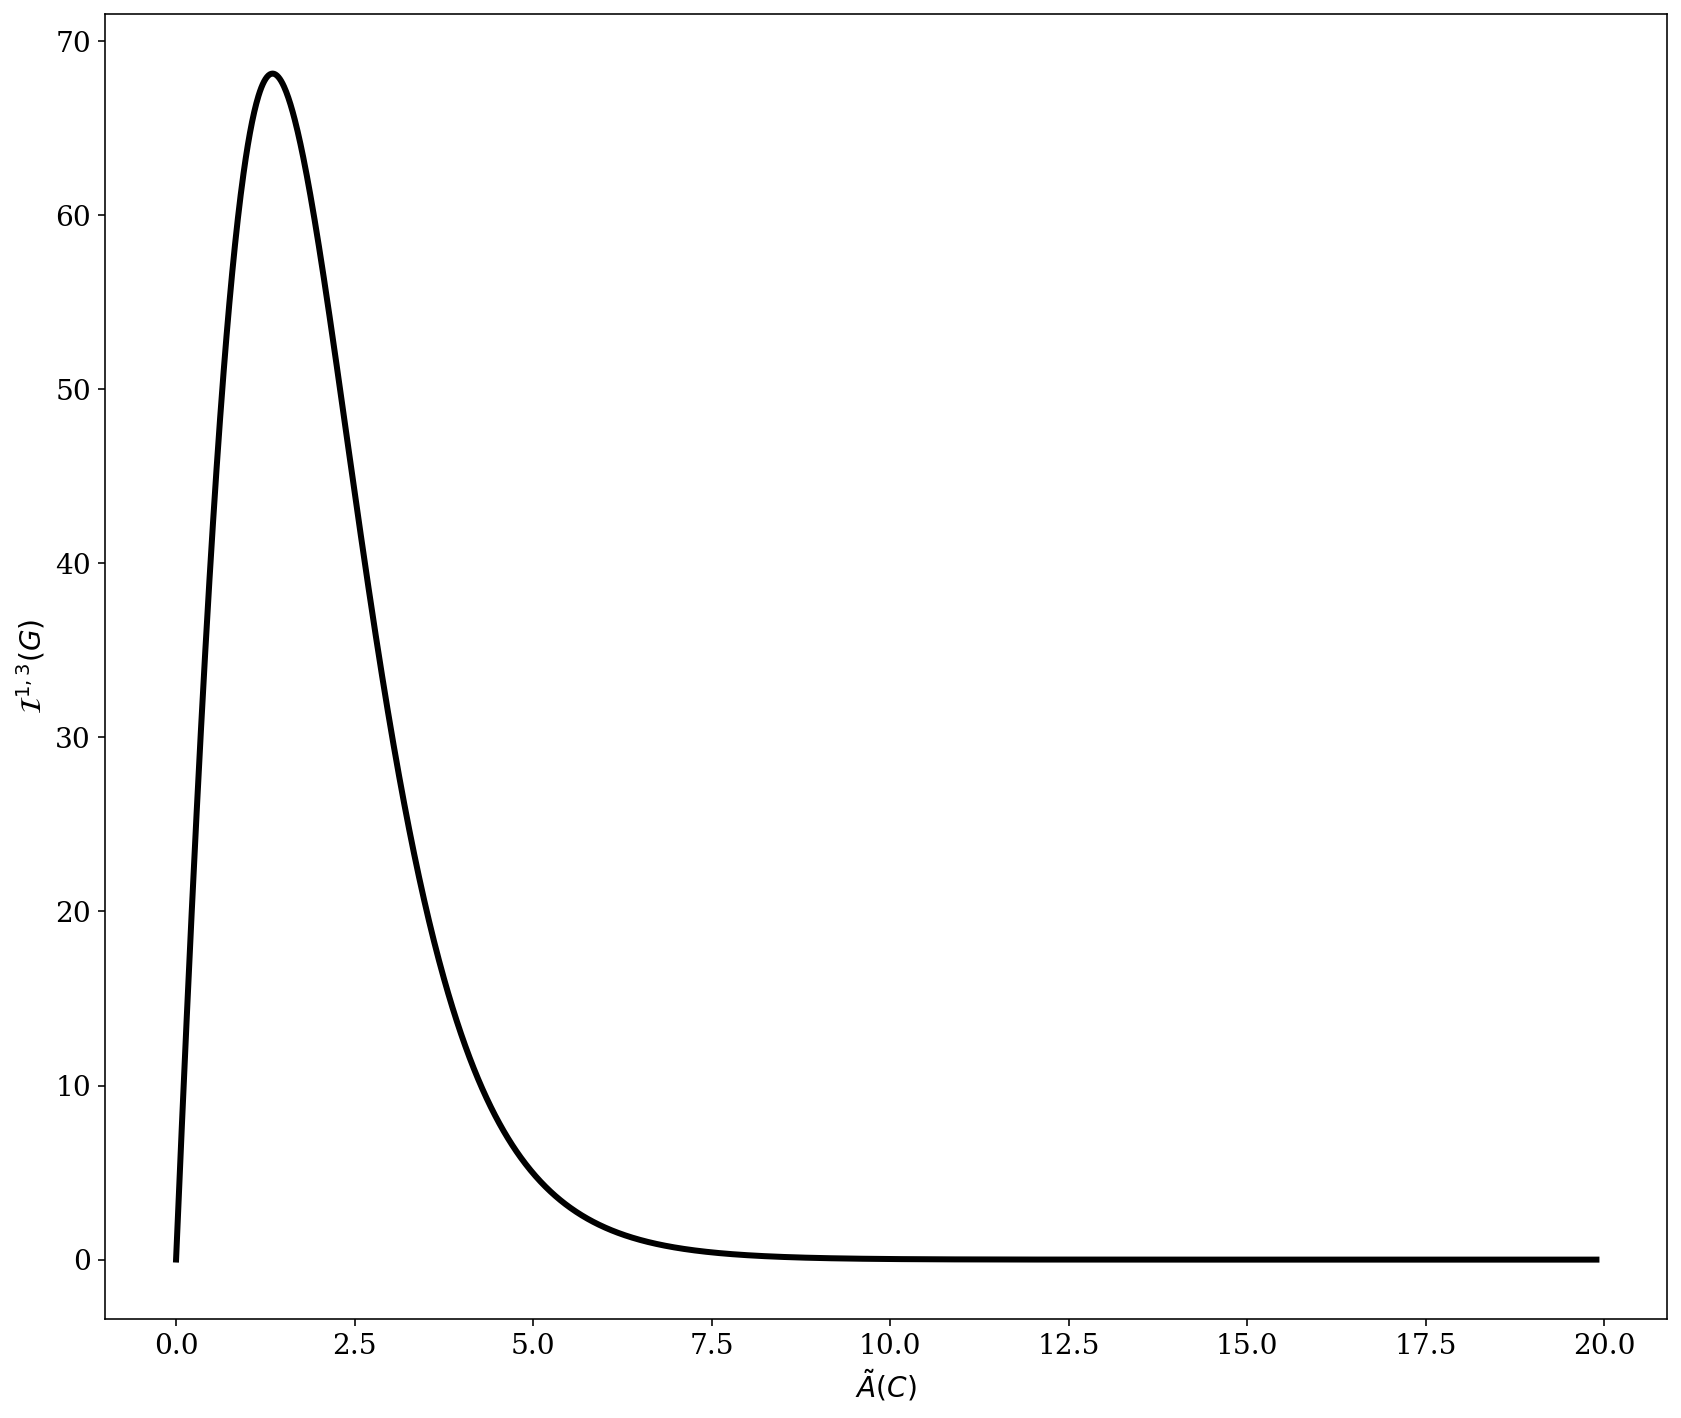

In [35]:
fig, ax = plt.subplots(figsize = (14, 12))
plt.plot(affinities, areas, color = "00000", linewidth=3)
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
#fig.savefig('title_here.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

To generate Figure 3B, we ran many force-area curves and selected a few that would visually demonstrate the force-area behavior when on the same plot. The starting equilibrium parameters and the index of the selected parameter are printed.

The purpose of the next block of code is to identify specific parameter sets that would be used in Figure 3B.

In [344]:
num_simulations = 20
num_perturbations = 2000
num_params = 6

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))

for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = equilibrium_parameters()
    print(params)
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = np.random.choice(np.arange(0,6),size=1)[0]
    print(param_choice)
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(params)
    L = Laplacian_K(params)
    tau, tau_max = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_MTT_K(params)
    
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)
        tau, tau_max = define_tau_range(L, max_points=500, cap_factor=10.0)
        pi = steady_state_MTT_K(params)

        a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

[1.01999533e+00 2.81094758e+02 4.25045104e-01 1.60426222e+00
 3.14041356e+01 3.26649309e+04]
2


100%|███████████████████████████████████████| 1999/1999 [02:14<00:00, 14.83it/s]


[1.86844101e+02 3.16803459e+01 2.85472993e+02 4.29514046e+00
 8.27589932e+00 2.11124223e-02]
1


100%|███████████████████████████████████████| 1999/1999 [02:12<00:00, 15.06it/s]


[2.04881433e+01 1.04372941e+02 5.05710914e-02 5.87916499e+02
 1.23818273e+00 7.33302865e+04]
3


100%|███████████████████████████████████████| 1999/1999 [02:15<00:00, 14.81it/s]


[1.50877016e-03 2.20959380e+02 7.87452924e+00 1.54464311e-02
 5.26791525e+00 1.51332320e+03]
1


100%|███████████████████████████████████████| 1999/1999 [02:13<00:00, 14.97it/s]


[2.88217426e-02 2.77929584e+00 1.05275423e-03 4.41154772e+01
 1.23771935e+02 5.00150499e+08]
0


100%|███████████████████████████████████████| 1999/1999 [02:13<00:00, 14.99it/s]


[7.30046509e-01 4.60363750e-02 2.27891341e+00 1.20248274e-01
 3.07172929e-02 1.02207921e-04]
5


100%|███████████████████████████████████████| 1999/1999 [02:01<00:00, 16.52it/s]


[1.88462409e-01 8.63645328e-03 2.49245933e+02 4.14017844e+01
 5.08470654e-02 3.87050436e-04]
3


100%|███████████████████████████████████████| 1999/1999 [02:12<00:00, 15.04it/s]


[5.60038680e-01 7.76754575e-01 1.06502139e+00 1.20540214e+02
 8.01452478e-03 1.25810591e+00]
0


100%|███████████████████████████████████████| 1999/1999 [02:10<00:00, 15.29it/s]


[4.97285789e+01 2.99412868e-01 1.86497919e-03 2.40360440e+00
 2.16332515e-02 1.67870821e-01]
2


100%|███████████████████████████████████████| 1999/1999 [02:10<00:00, 15.32it/s]


[1.75138706e-03 2.60310552e-03 1.44560523e+00 1.94664325e-03
 2.23428341e-02 4.47182247e-05]
0


100%|███████████████████████████████████████| 1999/1999 [02:01<00:00, 16.51it/s]


[2.08748297e-01 8.06971335e-03 1.47085509e-02 4.42825435e+01
 3.57188258e-02 4.15714347e+00]
1


100%|███████████████████████████████████████| 1999/1999 [02:09<00:00, 15.44it/s]


[13.45274896  0.24079726  0.15430468  4.41657657  0.49977745  0.25604943]
3


100%|███████████████████████████████████████| 1999/1999 [02:09<00:00, 15.38it/s]


[4.44268207e+01 3.01532780e-03 1.54311608e-01 2.58646622e-01
 7.21693427e+02 8.21013430e-02]
5


100%|███████████████████████████████████████| 1999/1999 [02:09<00:00, 15.42it/s]


[5.93070089e-03 4.25114956e+00 1.11866692e+01 5.73940248e-01
 2.87785631e+00 1.05836472e+02]
1


100%|███████████████████████████████████████| 1999/1999 [02:10<00:00, 15.32it/s]


[5.03500061e-02 9.50557893e+02 2.77454052e-02 7.01219806e+00
 9.86423654e-03 4.70658195e+04]
1


100%|███████████████████████████████████████| 1999/1999 [02:12<00:00, 15.08it/s]


[2.05686563e-03 3.92673557e+00 1.16222114e-01 8.27626490e-01
 8.17894192e+02 1.11190702e+07]
0


100%|███████████████████████████████████████| 1999/1999 [02:14<00:00, 14.87it/s]


[2.14251697e-01 1.12821727e+02 3.91376876e+01 6.95773628e+02
 8.48345424e-02 7.94170948e+02]
3


100%|███████████████████████████████████████| 1999/1999 [02:13<00:00, 15.02it/s]


[2.18910359e-01 3.58404185e-03 9.21456051e-03 3.73466178e+00
 3.31115739e-03 2.19716784e-02]
4


100%|███████████████████████████████████████| 1999/1999 [02:06<00:00, 15.77it/s]


[2.13296716e+01 5.33444564e-03 2.01176817e-03 1.28616771e-03
 1.16750979e+02 1.86674641e-02]
0


100%|███████████████████████████████████████| 1999/1999 [02:14<00:00, 14.87it/s]


[1.55093012e-01 3.31569343e-01 7.56155175e+02 6.05690997e+01
 1.10653701e+02 1.89490862e+01]
3


100%|███████████████████████████████████████| 1999/1999 [02:14<00:00, 14.85it/s]


In [45]:
#fig, ax = plt.subplots(figsize = (14, 12))

#for i in range(20):
#    plt.plot(mega_affinities[i,:], mega_areas[i,:],linewidth=2,label=i)

#plt.ylim(0,15)
#plt.legend()
#plt.xlabel(r"$\tilde{A}(C)$")
#plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
#plt.show()
#fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

Parameter sets used for Figure 3B:

1: `[4.97285789e+01 2.99412868e-01 1.86497919e-03 2.40360440e+00 2.16332515e-02 1.67870821e-01], params[2]`

2: `[2.08748297e-01 8.06971335e-03 1.47085509e-02 4.42825435e+01 3.57188258e-02 4.15714347e+00], params[1]`

3: `[4.44268207e+01 3.01532780e-03 1.54311608e-01 2.58646622e-01 7.21693427e+02 8.21013430e-02], params[5]`

4: `[2.18910359e-01 3.58404185e-03 9.21456051e-03 3.73466178e+00 3.31115739e-03 2.19716784e-02], params[4]`

5: `[8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181], params[0]`

In [48]:
# running this simulation for a sepecific parameter set
params1 = [4.97285789e+01, 2.99412868e-01, 1.86497919e-03, 2.40360440e+00, 2.16332515e-02, 1.67870821e-01]
param_choice1 = 2

num_perturbations = 2000

affinities1 = np.zeros(num_perturbations)
areas1 = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities1[i] = cycle_affinity_K(params1)
    
    # compute the autocorrelation functions
    L1 = Laplacian_K(params1)
    tau1, tau_max1 = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi1 = steady_state_MTT_K(params1)
    a1_13, a1_31 = asymmetric_autocorrelation(signal,L1,tau1,pi1,alpha=1,beta=3)
    
    # store the area
    areas1[i] = numerical_area(a1_13,a1_31)
    
    # modify the selected parameter
    params1[param_choice1] = params1[param_choice1]*1.01

100%|███████████████████████████████████████| 2000/2000 [01:42<00:00, 19.55it/s]


In [49]:
# running this simulation for a sepecific parameter set
params2 = [2.08748297e-01, 8.06971335e-03, 1.47085509e-02, 4.42825435e+01, 3.57188258e-02, 4.15714347e+00]
param_choice2 = 1

num_perturbations = 2000

affinities2 = np.zeros(num_perturbations)
areas2 = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities2[i] = cycle_affinity_K(params2)
    
    # compute the autocorrelation functions
    L2 = Laplacian_K(params2)
    tau2, tau_max2 = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi2 = steady_state_MTT_K(params2)
    a2_13, a2_31 = asymmetric_autocorrelation(signal,L2,tau2,pi2,alpha=1,beta=3)
    
    # store the area
    areas2[i] = numerical_area(a2_13,a2_31)
    
    # modify the selected parameter
    params2[param_choice2] = params2[param_choice2]*1.01

100%|███████████████████████████████████████| 2000/2000 [01:42<00:00, 19.46it/s]


In [51]:
# running this simulation for a sepecific parameter set
params3 = [4.44268207e+01, 3.01532780e-03, 1.54311608e-01, 2.58646622e-01, 7.21693427e+02, 8.21013430e-02]
param_choice3 = 5

num_perturbations = 2000

affinities3 = np.zeros(num_perturbations)
areas3 = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities3[i] = cycle_affinity_K(params3)
    
    # compute the autocorrelation functions
    L3 = Laplacian_K(params3)
    tau3, tau_max3 = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi3 = steady_state_MTT_K(params3)
    a3_13, a3_31 = asymmetric_autocorrelation(signal,L3,tau3,pi3,alpha=1,beta=3)
    
    # store the area
    areas3[i] = numerical_area(a3_13,a3_31)
    
    # modify the selected parameter
    params3[param_choice3] = params3[param_choice3]*1.01

100%|███████████████████████████████████████| 2000/2000 [01:44<00:00, 19.18it/s]


In [52]:
# running this simulation for a sepecific parameter set
params4 = [2.18910359e-01, 3.58404185e-03, 9.21456051e-03, 3.73466178e+00, 3.31115739e-03, 2.19716784e-02]
param_choice4 = 4

num_perturbations = 2000

affinities4 = np.zeros(num_perturbations)
areas4 = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities4[i] = cycle_affinity_K(params4)
    
    # compute the autocorrelation functions
    L4 = Laplacian_K(params4)
    tau4, tau_max4 = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi4 = steady_state_MTT_K(params4)
    a4_13, a4_31 = asymmetric_autocorrelation(signal,L4,tau4,pi4,alpha=1,beta=3)
    
    # store the area
    areas4[i] = numerical_area(a4_13,a4_31)
    
    # modify the selected parameter
    params4[param_choice4] = params4[param_choice4]*1.01

100%|███████████████████████████████████████| 2000/2000 [01:39<00:00, 20.12it/s]


In [53]:
# running this simulation for a sepecific parameter set
params5 = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
param_choice5 = 0

num_perturbations = 2000

affinities5 = np.zeros(num_perturbations)
areas5 = np.zeros(num_perturbations)

for i in tqdm(range(num_perturbations)):
    # store the affinity
    affinities5[i] = cycle_affinity_K(params5)
    
    # compute the autocorrelation functions
    L5 = Laplacian_K(params5)
    tau5, tau_max5 = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi5 = steady_state_MTT_K(params5)
    a5_13, a5_31 = asymmetric_autocorrelation(signal,L5,tau5,pi5,alpha=1,beta=3)
    
    # store the area
    areas5[i] = numerical_area(a5_13,a5_31)
    
    # modify the selected parameter
    params5[param_choice5] = params5[param_choice5]*1.01

100%|███████████████████████████████████████| 2000/2000 [01:46<00:00, 18.72it/s]


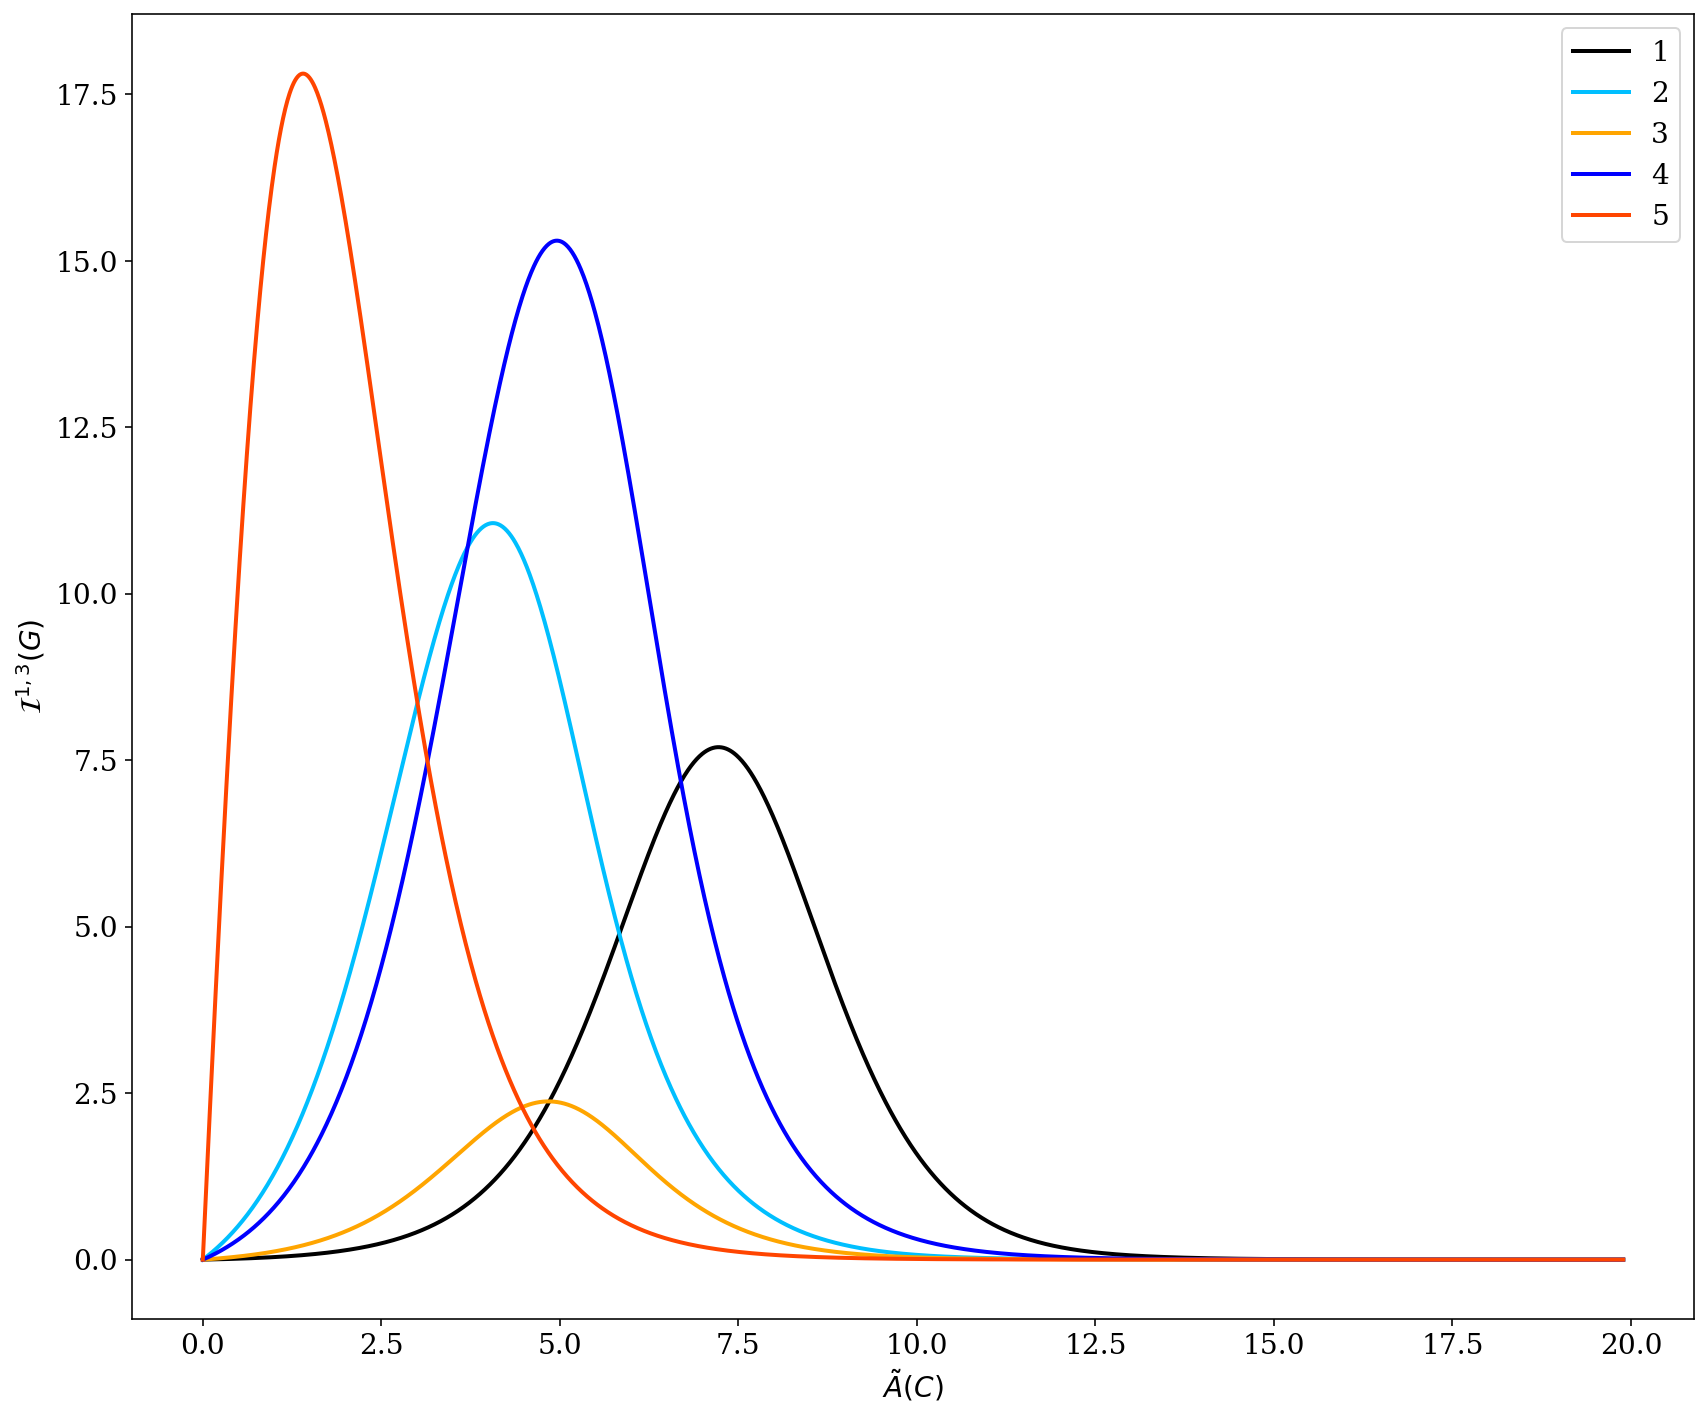

In [55]:
fig, ax = plt.subplots(figsize = (14, 12))

plt.plot(affinities1, areas1,linewidth=2, color='black', label = '1')
plt.plot(affinities2, areas2,linewidth=2, color = 'deepskyblue', label = '2')
plt.plot(affinities3, areas3,linewidth=2, color = 'orange', label = '3')
plt.plot(affinities4, areas4,linewidth=2, color = 'blue', label = '4')
plt.plot(affinities5, areas5,linewidth=2, color = 'orangered', label = '5')

#plt.plot(mega_affinities[8,:], mega_areas[8,:],linewidth=2, color=black, label = '1')
#plt.plot(mega_affinities[10,:], mega_areas[10,:],linewidth=2, color = 'deepskyblue', label = '2')
#plt.plot(mega_affinities[12,:], mega_areas[12,:],linewidth=2, color = 'orange', label = '3')
#plt.plot(mega_affinities[17,:], mega_areas[17,:],linewidth=2, color = 'blue', label = '4')
#plt.plot(affinities, areas,linewidth=2, color = 'orangered', label = '5')

plt.legend()
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
#fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

Additional figure: Selecting a different parameter to modify from the same starting equilibrium parameter set.

In [14]:
num_simulations = 6
num_perturbations = 2000
num_params = 6

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
param_choices = np.arange(0,6)

In [15]:
for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = equilibrium_parameters()
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = np.random.choice(np.arange(0,6),size=1)
    print(param_choice)
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(params)
    L = Laplacian_K(params)
    tau, tau_max = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_MTT(params)
    
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)
        pi = steady_state_MTT(params)

        a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

100%|███████████████████████████████████████| 1999/1999 [03:32<00:00,  9.42it/s]


In [308]:
colors = [black, strawberrypink, skyblue]

In [305]:
idx = np.argmax(mega_areas,axis=1)
print(idx)
print(mega_areas[np.arange(num_simulations), idx])
print(mega_affinities[np.arange(num_simulations), idx])

[ 379  438  570 1340  125  266]
[8.50822793e-01 1.18985780e+01 2.86059471e-02 7.63824489e-04
 4.97516035e-01 5.94003792e+01]
[ 3.77117539  4.35824491  5.67168859 13.33344334  1.24379136  2.64678801]


In [306]:
paramchoice_labels = ['a','b','d','c','f','e']

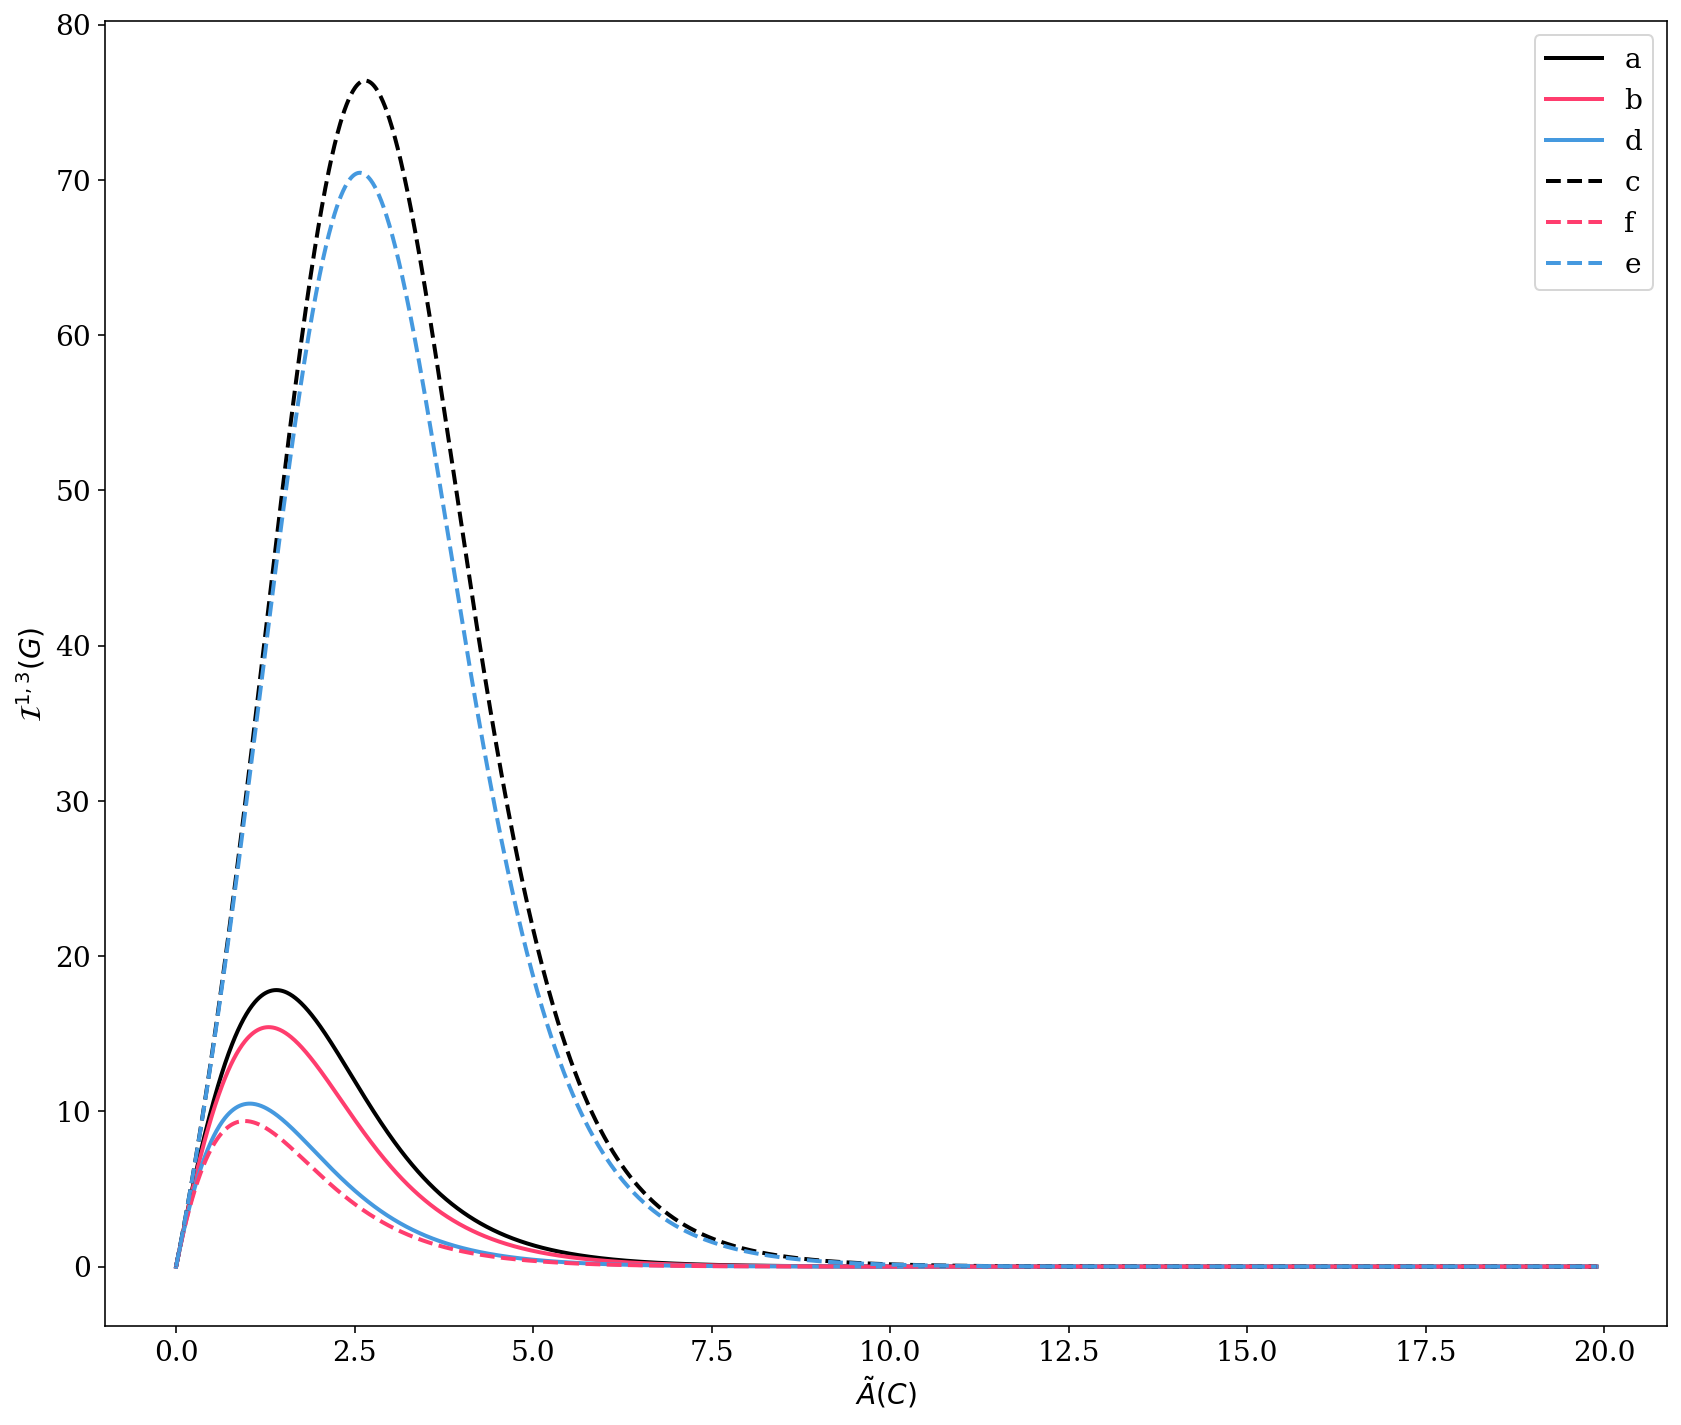

In [19]:
fig, ax = plt.subplots(figsize = (14, 12))
for i in range(0,3):
    plt.plot(mega_affinities[i,:], mega_areas[i,:],label=(paramchoice_labels[i]),color = colors[i],linewidth=2)
    
for i in range(3,6):
    plt.plot(mega_affinities[i,:], mega_areas[i,:], '--', label=(paramchoice_labels[i]),color = colors[i-3],linewidth=2)
    
plt.legend()
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
#fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')